## **Question 1**

In [5]:
# Reading the sample data
import pandas as pd
data = pd.read_csv("/content/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [8]:
# Data cleaning (handling missing data)
data.isna().any()

order_id          False
shop_id           False
user_id           False
order_amount      False
total_items       False
payment_method    False
created_at        False
dtype: bool

In [10]:
data.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


### The mean of order_amount is 3145.128 which is provided in the question. Here we can see there is a huge difference between min max values of order_amount which means it is possible that data has outlier.

### **a. A Better Way to Evaluate Data.**

### Let us calculate AOV by store(shop_id) first and visualize those values

In [31]:
store = data.groupby("shop_id").mean()
store.sort_values(by="order_amount",ascending=False).head()

,order_id,user_id,order_amount,total_items
shop_id,,,,
42,2441.921569,758.588235,235101.490196,667.901961
78,2663.021739,867.739130,49213.043478,1.913043
50,2162.431818,834.500000,403.545455,2.090909
90,2694.163265,839.857143,403.224490,2.265306
38,2639.714286,837.800000,390.857143,2.057143


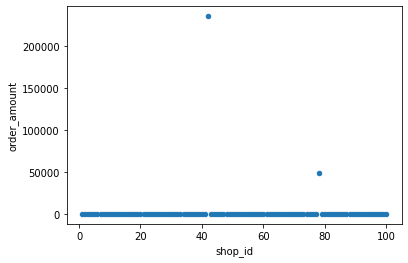

In [38]:
store.reset_index().plot.scatter(x='shop_id',y='order_amount')

Text(0, 0.5, 'Average order value by shop')

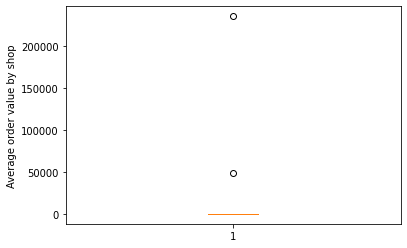

In [39]:
import matplotlib.pyplot as plt
plt.boxplot(store['order_amount'])
plt.ylabel("Average order value by shop")

### Here we can see there are two outliers which has impacted the mean. shop 42 and 78 have extreme average order values.

## **b. What metric can be used then.**

### If these two values were either errors we can remove them but if they aren't then we could use median instead of mean which will only provide the middle most value instead of average value.

## **c. What is the value.**

In [40]:
data['order_amount'].median()

284.0

### So $284 is the value that can be used instead of 3145.128

## **Question 2**

### **a. How many orders were shipped by Speedy Express in total?**

### SELECT count(*) as orders_shipped_by_speedy_Express FROM Orders where ShipperID in (Select ShipperID from Shippers where ShipperName="Speedy Express")

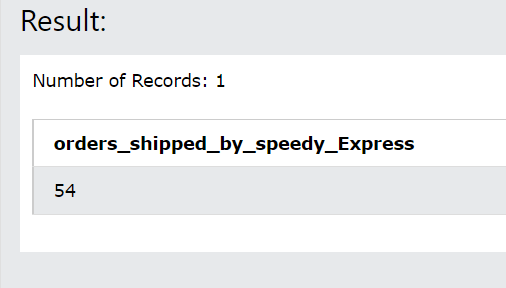



## **b. What is the last name of the employee with the most orders?**

### select LastName, count(*) as orders from Orders JOIN Employees on Orders.EmployeeID = Employees.EmployeeID group by LastName order by count(*) desc limit(1);

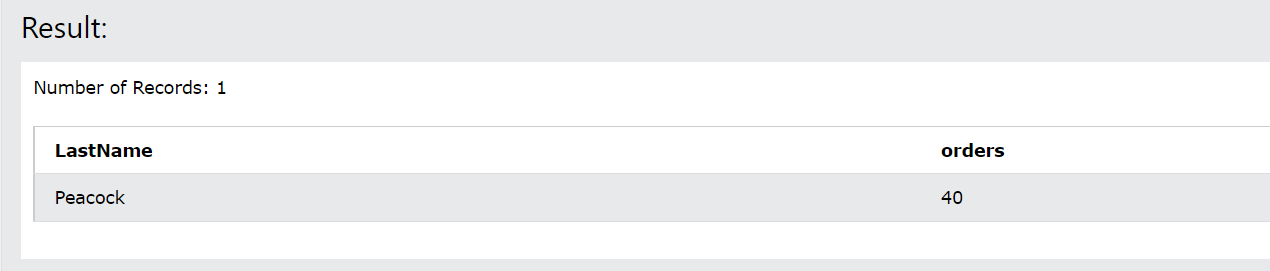

### Peacock is the lastname of the employee with most orders

## **c. What product was ordered the most by customers in Germany?**

### SELECT ProductName,sum(Quantity) as Quantity FROM OrderDetails Join Products on OrderDetails.ProductID = Products.ProductID where OrderID IN (Select Orders.OrderID from customers join Orders on Customers.CustomerID=Orders.CustomerID where Country='Germany' order by OrderID) group by Products.ProductID order by Quantity desc;

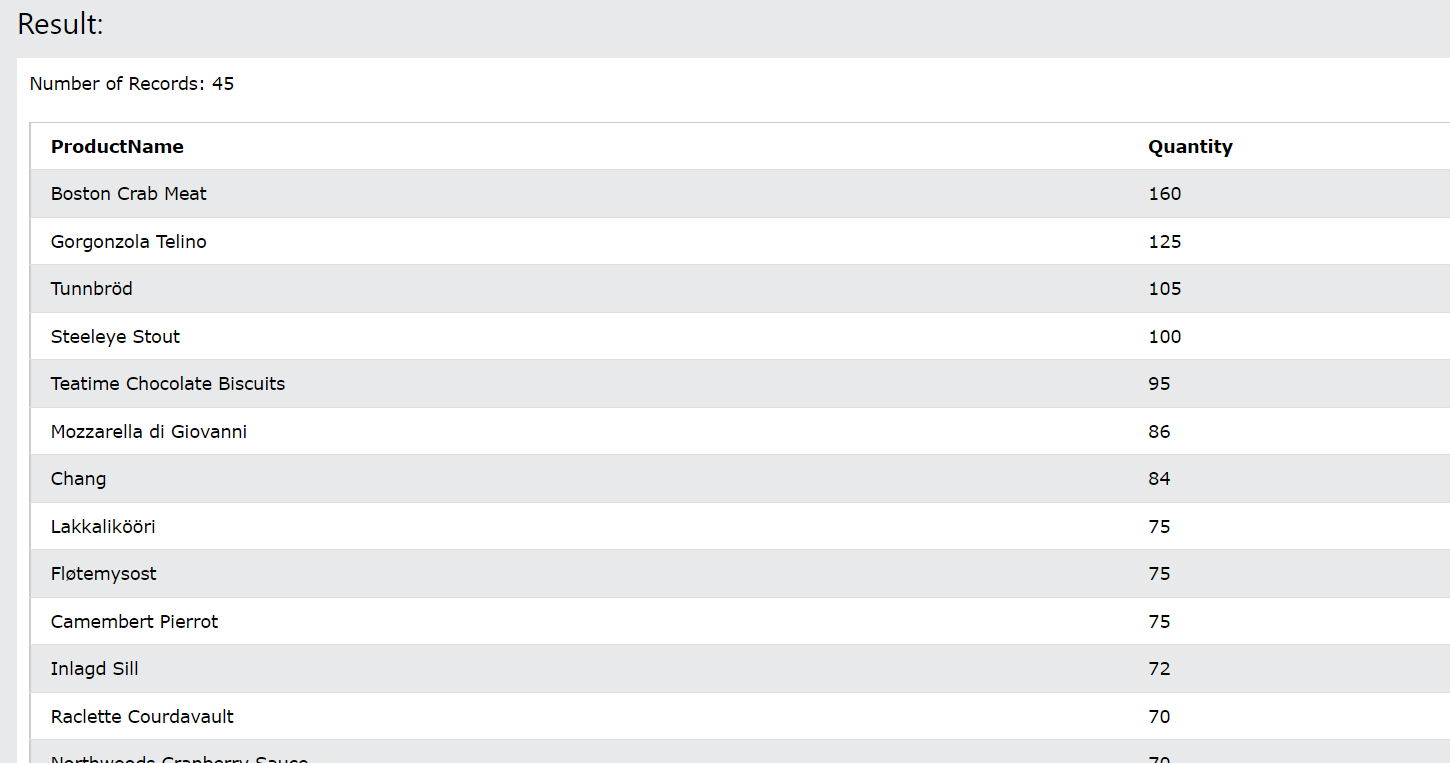